[NOTE BOOK](https://www.kaggle.com/sslazio/speech-emotion-recognition-with-cnn)

In [1]:
import os
import librosa
import librosa.display as lib_display
import IPython.display as ipd 
import pandas as pd
import ipywidgets.widgets as wdg 

In [2]:
BASE_DIR = os.path.abspath(os.curdir)
Dataset_Dir = os.path.join('Datasets','RAVDESS_DATASET')
print(BASE_DIR)

p:\TMSL\SEM3_Minor_Projet\Notebooks


In [3]:
#get the list of all actors under ravdess dataset
actors = os.listdir(os.path.join(BASE_DIR, Dataset_Dir))
actors

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

## code emotion
>emotion
> - 1:'neutral'
> - 2:'calm'
> - 3:'happy'
> - 4:'sad'
> - 5:'angry'
> - 6:'fear'
> - 7:'disgust'
> - 8:'surprise'

In [4]:
emotion_dictionary = {
        1:'neutral',
        2:'calm',
        3:'happy',
        4:'sad',
        5:'angry',
        6:'fearful',
        7:'disgust',
        8:'surprised'
    }

In [5]:
def find_emotion(filename):
    """
        @filename : taking the voice input filename 
        
        @returning emotion code by extracting it 
    """
    parta,partb = filename.split('.')
    codes = parta.split('-')
    #print(*codes)
    return int(codes[2])

In [6]:
#get the list of voice-samples of each actor and access all samples one by one
file_paths = []
file_emotion = []
for actor in actors:
    base_path_to_each_actor = os.path.join(BASE_DIR,Dataset_Dir,actor)
    voice_samples = os.listdir(base_path_to_each_actor)
    for sample in voice_samples:
        print(os.path.join(base_path_to_each_actor,sample))
        file_paths.append(os.path.join(base_path_to_each_actor,sample))
        file_emotion.append(find_emotion(sample))
        print(f"Emotion for file - {sample} : {emotion_dictionary[find_emotion(sample)]}")

p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\RAVDESS_DATASET\Actor_01\03-01-01-01-01-01-01.wav
Emotion for file - 03-01-01-01-01-01-01.wav : neutral
p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\RAVDESS_DATASET\Actor_01\03-01-01-01-01-02-01.wav
Emotion for file - 03-01-01-01-01-02-01.wav : neutral
p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\RAVDESS_DATASET\Actor_01\03-01-01-01-02-01-01.wav
Emotion for file - 03-01-01-01-02-01-01.wav : neutral
p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\RAVDESS_DATASET\Actor_01\03-01-01-01-02-02-01.wav
Emotion for file - 03-01-01-01-02-02-01.wav : neutral
p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\RAVDESS_DATASET\Actor_01\03-01-02-01-01-01-01.wav
Emotion for file - 03-01-02-01-01-01-01.wav : calm
p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\RAVDESS_DATASET\Actor_01\03-01-02-01-01-02-01.wav
Emotion for file - 03-01-02-01-01-02-01.wav : calm
p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\RAVDESS_DATASET\Actor_01\03-01-02-01-02-01-01.wav
Emotion for file 

## DataFrame set up

In [7]:
df = pd.DataFrame(list(zip(file_emotion,file_paths)), columns=['Emotion','Path'])
df

,Emotion,Path
0,1,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
1,1,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
2,1,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
3,1,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
4,2,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
...,...,...
1435,8,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
1436,8,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
1437,8,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
1438,8,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...


In [8]:
df.Emotion.replace(emotion_dictionary,inplace=True)
df

,Emotion,Path
0,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
1,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
2,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
3,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
4,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
...,...,...
1435,surprised,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
1436,surprised,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
1437,surprised,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
1438,surprised,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...


In [9]:
df.to_csv("Emotion_path_mapped.csv", index=False)

In [10]:
#!pip install seaborn

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\PRITAM\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


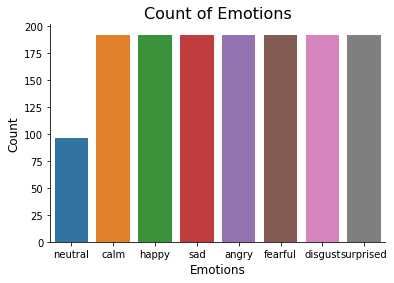

In [12]:
plt.title('Count of Emotions', size=16)
sns.countplot(df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [13]:

def create_waveplot(data, samp_rate, emotion):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {emotion} emotion', size=15)
    lib_display.waveshow(data, sr=samp_rate)
    plt.show()

def create_spectrogram(data, samp_rate, emotion):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    # print(f"X : {X}")
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3)) #12 inchs X 3 inchs 
    plt.title(f'Spectrogram for audio with {emotion} emotion', size=15)
    lib_display.specshow(Xdb, sr=samp_rate, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [14]:

emos = df.Emotion.unique()
# print(emos)
emo_wdg = wdg.Dropdown(
    options=emos,
    value=emos[0],
    description='Emotion',
    disabled=False,
)

emo_wdg

Dropdown(description='Emotion', options=('neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'su…

p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\RAVDESS_DATASET\Actor_22\03-01-03-01-02-01-22.wav


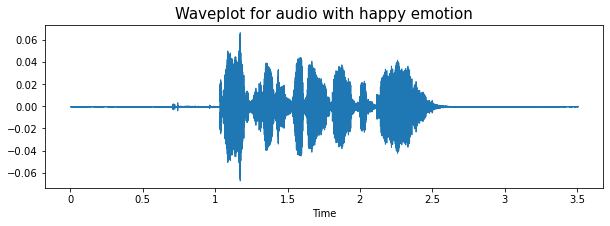

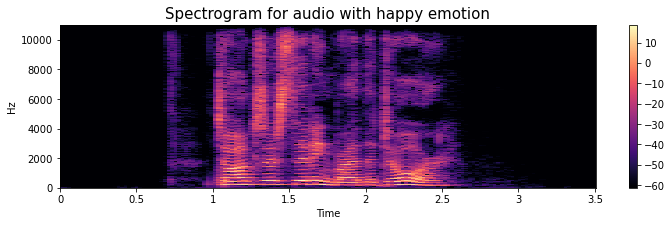

In [16]:
import numpy as np
import random as rnd
csv_file_path = "Emotion_path_mapped.csv"
df = pd.read_csv(csv_file_path,index_col=False).drop(['Unnamed: 0'],axis=1)
# df.head(3)
emotion=emo_wdg.value
path = rnd.choice(np.array(df.Path[df.Emotion==emotion]))
print(path)
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
# ipd.Audio(path)


In [16]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

In [17]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [18]:
X, Y = [], []
for path, emotion in zip(df.Path, df.Emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [19]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)

In [20]:
Features = pd.read_csv('features.csv', index_col=False)
Features.head(10)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.300781,0.706492,0.756853,0.735217,0.731014,0.715156,0.667529,0.673754,0.722173,0.748969,...,4.319263e-06,0.000003,0.000002,2.286677e-06,5.131693e-06,8.065748e-06,0.000005,2.270858e-06,1.642365e-07,neutral
1,0.302337,0.753295,0.809354,0.800116,0.797891,0.809019,0.749287,0.671850,0.712690,0.743304,...,2.467186e-05,0.000025,0.000022,2.268102e-05,2.648284e-05,2.950233e-05,0.000026,2.186519e-05,2.084610e-05,neutral
2,0.176693,0.640605,0.712837,0.743736,0.714797,0.701402,0.694569,0.663853,0.688527,0.742508,...,7.999367e-07,0.000001,0.000001,5.350822e-07,3.480663e-07,8.398364e-07,0.000001,4.287777e-07,2.878995e-08,neutral
3,0.271272,0.674966,0.723259,0.724594,0.681302,0.670643,0.674574,0.630036,0.680146,0.708276,...,6.998011e-06,0.000007,0.000007,6.999257e-06,1.217880e-05,9.449918e-06,0.000008,2.638513e-06,1.788902e-07,neutral
4,0.289420,0.732559,0.781024,0.791920,0.750578,0.757456,0.738441,0.637904,0.682981,0.715242,...,2.153308e-05,0.000021,0.000022,2.044176e-05,2.456060e-05,2.247440e-05,0.000021,1.499215e-05,1.356905e-05,neutral
5,0.161267,0.640367,0.651222,0.741996,0.684241,0.637188,0.655669,0.688134,0.607509,0.662895,...,8.802705e-07,0.000001,0.000001,1.295319e-06,8.929181e-07,1.325259e-06,0.000002,5.423552e-07,2.560080e-08,neutral
6,0.307369,0.716178,0.761089,0.758008,0.758388,0.734855,0.649470,0.630941,0.680735,0.738601,...,1.281951e-05,0.000013,0.000015,1.986458e-05,2.776636e-05,4.780266e-05,0.000025,8.083573e-06,6.468821e-07,neutral
7,0.326461,0.797163,0.837167,0.822405,0.839620,0.821721,0.723051,0.632044,0.693335,0.752547,...,1.264349e-04,0.000123,0.000131,1.380810e-04,1.469645e-04,1.587365e-04,0.000140,1.253949e-04,1.222731e-04,neutral
8,0.178993,0.686548,0.774859,0.747093,0.695773,0.713015,0.620029,0.585233,0.619675,0.706643,...,1.441605e-06,0.000003,0.000003,3.667340e-06,3.107988e-06,6.225695e-06,0.000005,3.036155e-06,1.252423e-07,neutral
9,0.297314,0.743129,0.754720,0.747343,0.733528,0.726183,0.682260,0.676388,0.701887,0.736036,...,1.986174e-05,0.000019,0.000025,8.028382e-05,4.014648e-05,3.653998e-05,0.000031,1.029439e-05,6.636481e-07,neutral


In [21]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import sys
# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [37]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

auto


In [24]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [25]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [26]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162, 1), (3240, 8), (1080, 162, 1), (1080, 8))

In [27]:
model=Sequential()
model.add(Conv1D(256, kernel_size=3, strides=2, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

# model.add(Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))
# model.add(Dropout(0.1))

model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 81, 256)           1024      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 41, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 21, 256)           327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 128)           163968    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 128)            0

In [28]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
26/26 [==============================] - 3s 68ms/step - loss: 2.0227 - accuracy: 0.1623 - val_loss: 1.9746 - val_accuracy: 0.2574
Epoch 2/50
26/26 [==============================] - 1s 47ms/step - loss: 1.9746 - accuracy: 0.1991 - val_loss: 1.9230 - val_accuracy: 0.2241
Epoch 3/50
26/26 [==============================] - 1s 52ms/step - loss: 1.9356 - accuracy: 0.2185 - val_loss: 1.8754 - val_accuracy: 0.2583
Epoch 4/50
26/26 [==============================] - 1s 41ms/step - loss: 1.8907 - accuracy: 0.2309 - val_loss: 1.8031 - val_accuracy: 0.3056
Epoch 5/50
26/26 [==============================] - 1s 57ms/step - loss: 1.8521 - accuracy: 0.2540 - val_loss: 1.7904 - val_accuracy: 0.2972
Epoch 6/50
26/26 [==============================] - 2s 58ms/step - loss: 1.8214 - accuracy: 0.2812 - val_loss: 1.7262 - val_accuracy: 0.3537
Epoch 7/50
26/26 [==============================] - 2s 58ms/step - loss: 1.7656 - accuracy: 0.2994 - val_loss: 1.6593 - val_accuracy: 0.3843
Epoch 8/50
26

34/34 [==============================] - 0s 5ms/step - loss: 1.3588 - accuracy: 0.6315
Accuracy of our model on test data :  63.148146867752075 %


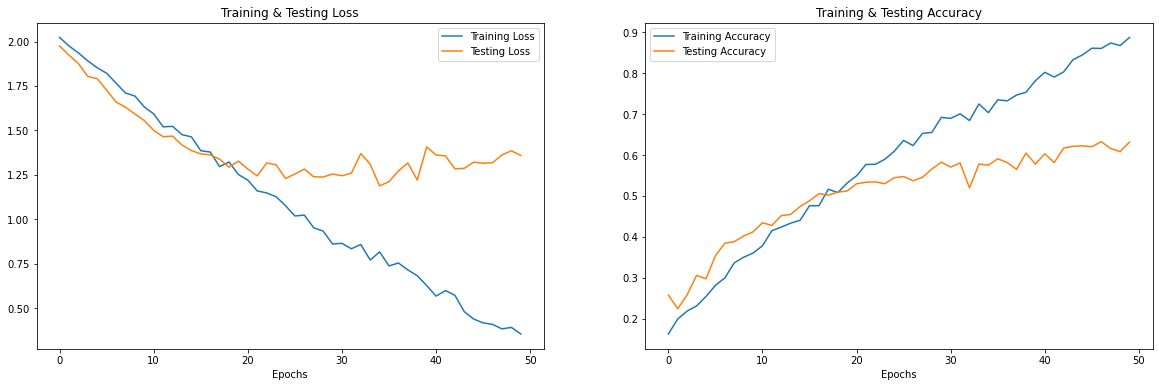

In [29]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [30]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [31]:
model.save(os.path.join("Models","Model_3.h5"))

In [32]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.tail(10)

,Predicted Labels,Actual Labels
1070,fearful,fearful
1071,calm,calm
1072,fearful,fearful
1073,fearful,happy
1074,fearful,fearful
1075,sad,surprised
1076,angry,angry
1077,surprised,surprised
1078,calm,calm
1079,sad,sad


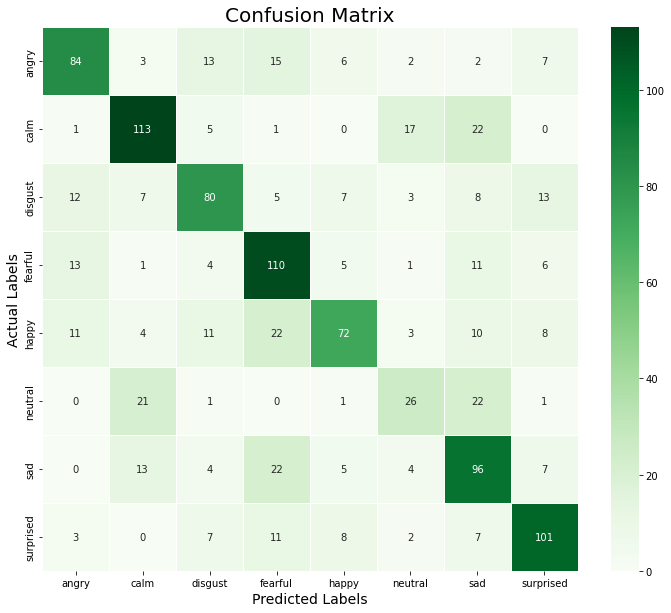

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Greens', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()